<a href="https://colab.research.google.com/github/ipinmi/ML-algorithms/blob/main/logistic_regression_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
!wget $data -O data-week-3.csv 

In [ ]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


# validation framework

using scikit learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [ ]:
len(df_train), len(df_val), len(df_test), len(df_full_train)

(4225, 1409, 1409, 5634)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

#EDA

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)


In [ ]:
#check for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [ ]:
 global_churn_rate = df_full_train.churn.mean()
 round(global_churn_rate, 2)

0.27

In [ ]:
numerical  = ['tenure', 'monthlycharges', 'totalcharges']


In [ ]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#feature importance

In [ ]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [ ]:
global_churn_rate

0.26996805111821087

In [ ]:
churn_single = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_single

0.3298090040927694

In [ ]:
churn_notsingle = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_notsingle

0.20503330866025166

In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
  print(c)
  df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk'] = df_group['mean'] / global_churn_rate
  display(df_group)
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# FEATURE IMPORTANCE Mutual Information

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [ ]:
def mutual_info_churn(series):
  return mutual_info_score(series, df_full_train.churn)

In [ ]:
mi = df_full_train[categorical].apply(mutual_info_churn)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#correlation

In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

#one hot encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
X_train = dv.fit_transform(train_dicts)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [ ]:
X_val = dv.fit_transform(val_dicts)

# Logistic regression

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-5, 5, 51)

In [ ]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

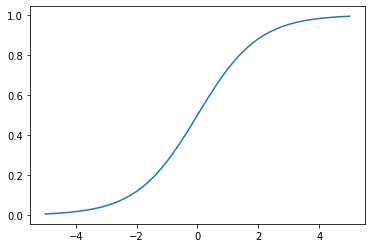

In [ ]:
plt.plot(z, sigmoid(z))

# training 

In [ ]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j] * w[j]

  result = sigmoid(score)
  return result 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#for the weights
model.coef_[0].round(3)

array([ 0.473, -0.176, -0.428, -0.014, -0.116,  0.069, -0.103, -0.097,
       -0.024, -0.107, -0.346,  0.318, -0.103,  0.003, -0.179,  0.087,
       -0.039,  0.116, -0.103, -0.143,  0.273, -0.103, -0.3  , -0.219,
        0.088, -0.128, -0.003, -0.06 , -0.118,  0.233, -0.185,  0.087,
       -0.218,  0.236, -0.116, -0.103,  0.089, -0.11 , -0.103,  0.082,
        0.223, -0.103, -0.251, -0.064,  0.   ])

In [ ]:
#for the bias 
model.intercept_[0]

-0.1321770592069044

In [ ]:
#hard predictions NO PROBABILTY
model.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#soft predictions  PROBABILTY
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
df_val[churn_decision].customerid

10      6551-gnydg
16      0689-nkylf
18      3398-fshon
19      4704-eryfc
26      8258-gstjk
           ...    
1376    9850-owrhq
1387    1965-ddbwu
1389    9389-acwbi
1393    8837-vvwlq
1405    4273-mbhya
Name: customerid, Length: 326, dtype: object

In [ ]:
#accuracy
churn_decision.astype(int)
(y_val == churn_decision).mean()

0.8026969481902059

In [ ]:
df_pred = pd.DataFrame()
df_pred['PROBABILTY'] = y_pred
df_pred['actual'] = y_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred

,PROBABILTY,actual,prediction,correct
0,0.223503,0,0,True
1,0.257956,1,0,False
2,0.274485,0,0,True
3,0.348065,1,0,False
4,0.066209,0,0,True
...,...,...,...,...
1404,0.030129,0,0,True
1405,0.797612,0,1,False
1406,0.002839,0,0,True
1407,0.118376,0,0,True


# interpretation

In [ ]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.473,
 'contract=one_year': -0.176,
 'contract=two_year': -0.428,
 'dependents=no': -0.014,
 'dependents=yes': -0.116,
 'deviceprotection=no': 0.069,
 'deviceprotection=no_internet_service': -0.103,
 'deviceprotection=yes': -0.097,
 'gender=female': -0.024,
 'gender=male': -0.107,
 'internetservice=dsl': -0.346,
 'internetservice=fiber_optic': 0.318,
 'internetservice=no': -0.103,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.179,
 'multiplelines=no_phone_service': 0.087,
 'multiplelines=yes': -0.039,
 'onlinebackup=no': 0.116,
 'onlinebackup=no_internet_service': -0.103,
 'onlinebackup=yes': -0.143,
 'onlinesecurity=no': 0.273,
 'onlinesecurity=no_internet_service': -0.103,
 'onlinesecurity=yes': -0.3,
 'paperlessbilling=no': -0.219,
 'paperlessbilling=yes': 0.088,
 'partner=no': -0.128,
 'partner=yes': -0.003,
 'paymentmethod=bank_transfer_(automatic)': -0.06,
 'paymentmethod=credit_card_(automatic)': -0.118,
 'paymentmethod=electronic_check': 0.233,


In [ ]:
subset = ['contract', 'tenure', 'monthlycharges']

In [ ]:
dicts_train_small = df_train[subset].to_dict(orient='records')
dicts_val_small = df_val[subset].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

-2.612827997231189

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 1.055, -0.008, -1.047,  0.029, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 1.055,
 'contract=one_year': -0.008,
 'contract=two_year': -1.047,
 'monthlycharges': 0.029,
 'tenure': -0.036}

In [ ]:
sigmoid(-2.61 + 1.055 + 50 * 0.029  + 5 * (-0.036))

0.4292283881055083

using the model

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
X_test = dv.fit_transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [ ]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.815471965933286

In [ ]:
customer = dicts_test[11]
customer

{'contract': 'one_year',
 'dependents': 'yes',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 101.05,
 'multiplelines': 'yes',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 68,
 'totalcharges': 6770.5}

In [ ]:
X_cus = dv.transform([customer])

In [ ]:
model.predict_proba(X_cus)

array([[0.83245393, 0.16754607]])

In [ ]:
y_test[11]

0